# Heart Diseases Prediction - ML Project
#### **Roll No.**

*CS21092*

*CS21083*

*CS21077*

## About the dataset


https://archive.ics.uci.edu/dataset/45/heart+disease

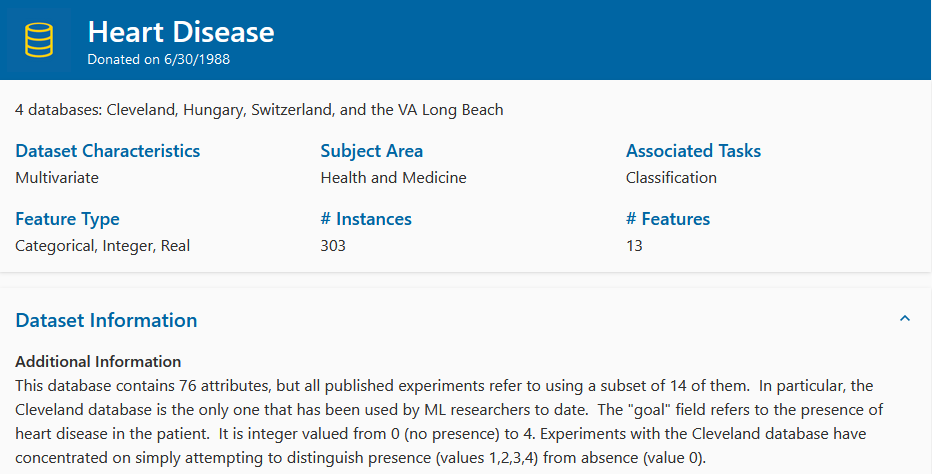


In [125]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


## Get the data

In [126]:
pip install ucimlrepo

In [127]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

"""
From the repository

The "goal" field refers to the presence of heart disease in the patient.
It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland
database have concentrated on simply attempting to distinguish
presence (values 1,2,3,4) from absence (value 0).
"""

print("Y \n", y.head())

# making y binary where 0 means absence and 1 means presence
y_processed = pd.DataFrame(np.where(y == 0, 0, 1), columns=['num'])
print("Processed Y",y_processed.head())




Y 
    num
0    0
1    2
2    1
3    0
4    0
Processed Y    num
0    0
1    1
2    1
3    0
4    0


In [128]:
df = pd.concat([X, y_processed], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Dataset description - **Taken from the metadata**
     
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __age__ | Age of the patient in years |
| __sex__ | Gender of the patient (0 = male, 1 = female) |
| __cp__ | Chest pain type: <br> 1: Typical angina <br> 2: Atypical angina <br> 3: Non-anginal pain <br> 4: Asymptomatic |
| __trestbps__ | Resting blood pressure in mm Hg (on admission to the hospital)|
| __chol__ | Serum cholesterol in mg/dl |                     
| __fbs__ | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false) |
| __restecg__ | Resting electrocardiographic results: <br> 0: Normal <br> 1: Having ST-T wave abnormality <br> 2: Showing probable or definite left ventricular hypertrophy |  
| __thalach__ | Maximum heart rate achieved during a stress test |                      
| __exang__ | Exercise-induced angina (1 = yes, 0 = no) |
| __oldpeak__ | ST depression induced by exercise relative to rest |
| __slope__ | Slope of the peak exercise ST segment: <br> 1: Upsloping <br> 2: Flat <br> 3: Downsloping |                      
| __ca__ | Number of major vessels (0-3) colored by fluoroscopy |              
| __thal__ | Thalium stress test result: <br> 3: Normal <br> 6: Fixed defect <br> 7: Reversible defect  |
| __target__ | Heart disease status (0 = no disease, 1 = presence of disease) |

## Feature Engineering
*Step 1* - **Exploratory Data Analysis**

*Step 2* - **Handle Outliers**

*Step 3* - **Handle Missing Values**

*Step 4* - **Feature Scaling**

In [129]:
# splitting into train and test sets to avoid Data Leakage
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Exploratory Data Analysis
***Steps to perform***

* *Univariate analysis*
* *Bivariate analysis*
* *Visualize missing values*
* *Identify outliers*

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


There **303 records** in the dataset and **13 features** making shape of the dataset **(303,13)**.  

Missing values in **ca** = 4

Missing values in **thal** = 2

In [131]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


**No categorical features**. However, some features although are numbers but have categorical nature. These features include sex, fbs, restecg, thal, slope, cp, exang and target

In [132]:
numeric_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_feat = ['sex', 'restecg', 'thal', 'slope', 'cp', 'exang', 'num', 'ca','fbs']

#### Univariant Analysis

##### Categorical features

categorical_feat = ['sex', 'restecg', 'thal', 'slope', 'cp', 'exang', 'num','ca']

In [133]:
def plot_count(dataframe:pd.DataFrame,feat:str,x_label:str,x_ticks:list[str]=None):
  if x_ticks:
    ax = sns.countplot(x=feat, data=dataframe,palette='colorblind')
    ax.set_xticklabels(x_ticks)
  else:
    ax = sns.countplot(x=feat, data=dataframe,palette='colorblind')

  ax.set_xlabel(x_label)
  return ax


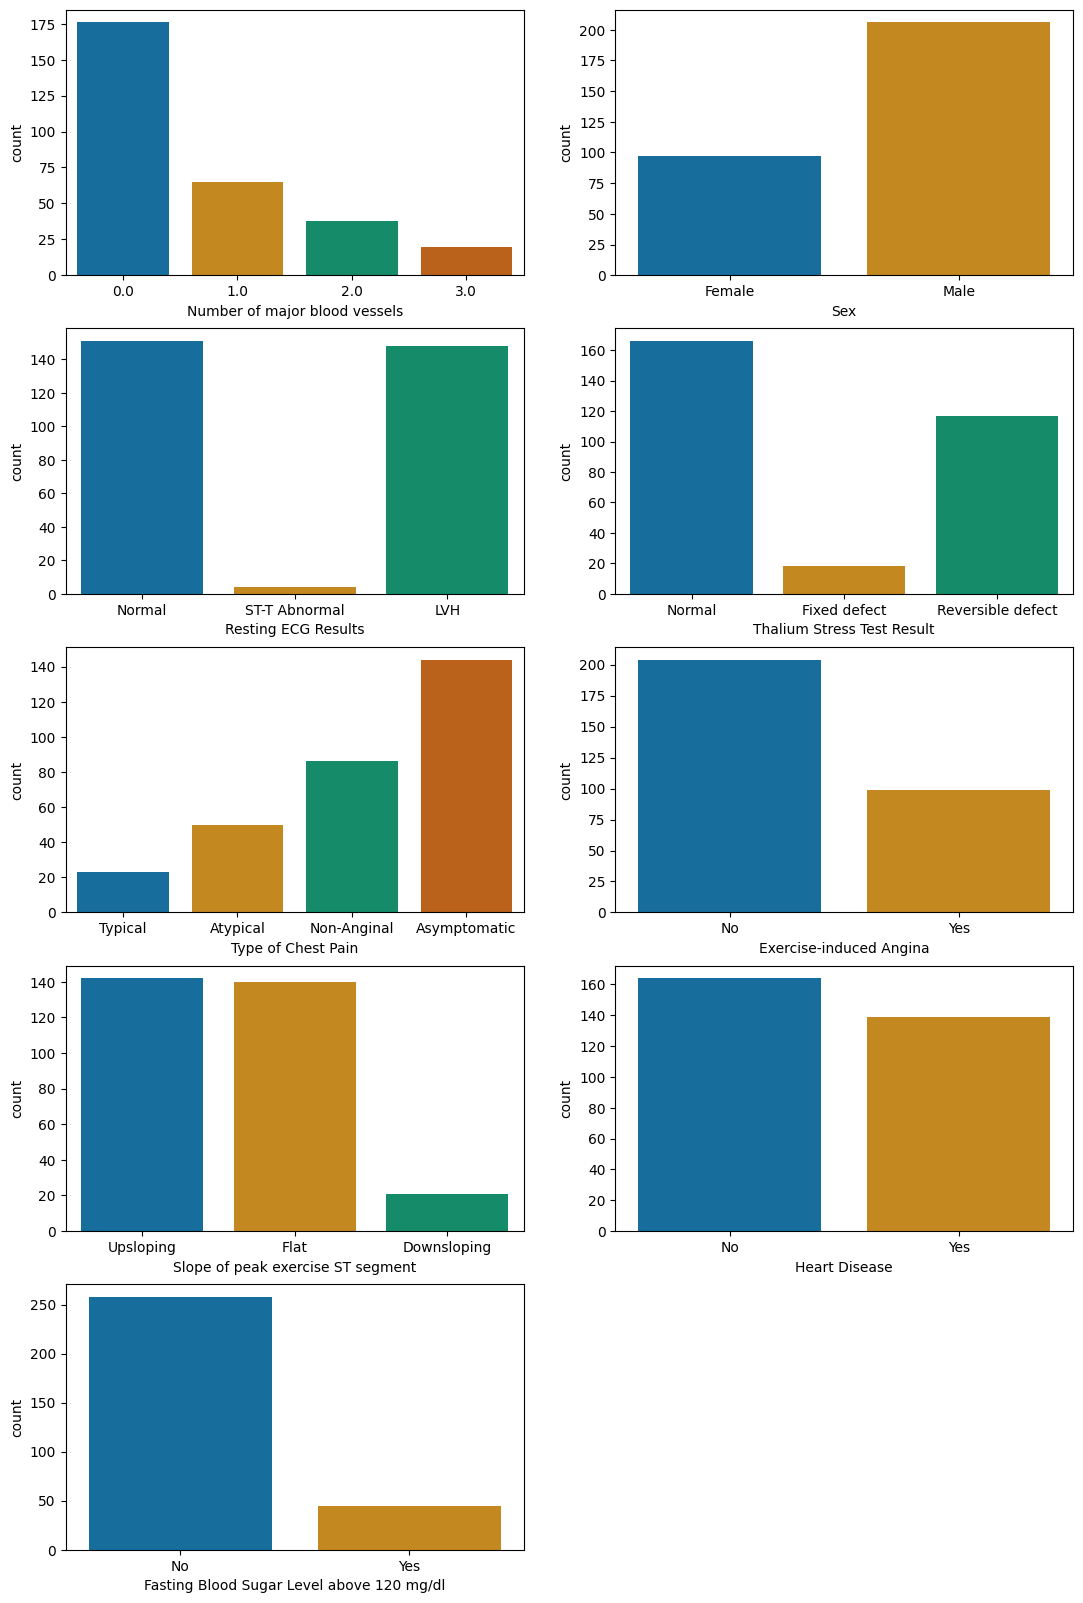

In [134]:
plt.figure(figsize=(13,20))
plt.subplot(5,2,1)
plot_count(df,feat='ca',x_label='Number of major blood vessels')
plt.subplot(5,2,2)
plot_count(df,feat='sex',x_label='Sex', x_ticks=['Female', 'Male'])
plt.subplot(5,2,3)
plot_count(df,feat='restecg',x_label="Resting ECG Results", x_ticks=['Normal', 'ST-T Abnormal','LVH'])
plt.subplot(5,2,4)
plot_count(df,feat='thal',x_label="Thalium Stress Test Result", x_ticks=['Normal','Fixed defect','Reversible defect'])
plt.subplot(5,2,5)
plot_count(df,feat='cp',x_label="Type of Chest Pain", x_ticks=['Typical', 'Atypical','Non-Anginal','Asymptomatic'])
plt.subplot(5,2,6)
plot_count(df,feat='exang',x_label="Exercise-induced Angina", x_ticks=['No', 'Yes'])
plt.subplot(5,2,7)
plot_count(df,feat='slope',x_label="Slope of peak exercise ST segment", x_ticks=['Upsloping','Flat','Downsloping'])
plt.subplot(5,2,8)
plot_count(df,feat='num',x_label="Heart Disease", x_ticks=['No', 'Yes'])
plt.subplot(5,2,9)
plot_count(df,feat='fbs',x_label="Fasting Blood Sugar Level above 120 mg/dl", x_ticks=['No', 'Yes'])

plt.show()

###### **Inference**

* Target variable appears to be **balanced** with approximately **160** *negatives* and **140** *positive* cases
* Male patients are almost twice more than female patients so this dataset may be **male bias**
* Most patients report **asymptomatic** chest pain
* Most patients have **normal** thalium stress level
* Majority patients **did not** report any exercise-related chest pain
* Majority patients **do not** have high blood sugar
* Majority patients during Thalium stress test showed **no major signs** of any heart disease
* Approximately half the patients showed **normal** heart beat during resting ECG and the other half show signs of **left ventricular hypertrophy**



##### Numeric features
numeric_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [135]:
def plot_histogram(dataframe:pd.DataFrame,feat:str,x_label:str):
  ax = sns.histplot(x=feat, kde=True, data=dataframe,color="purple")
  ax.set_xlabel(x_label)
  return ax


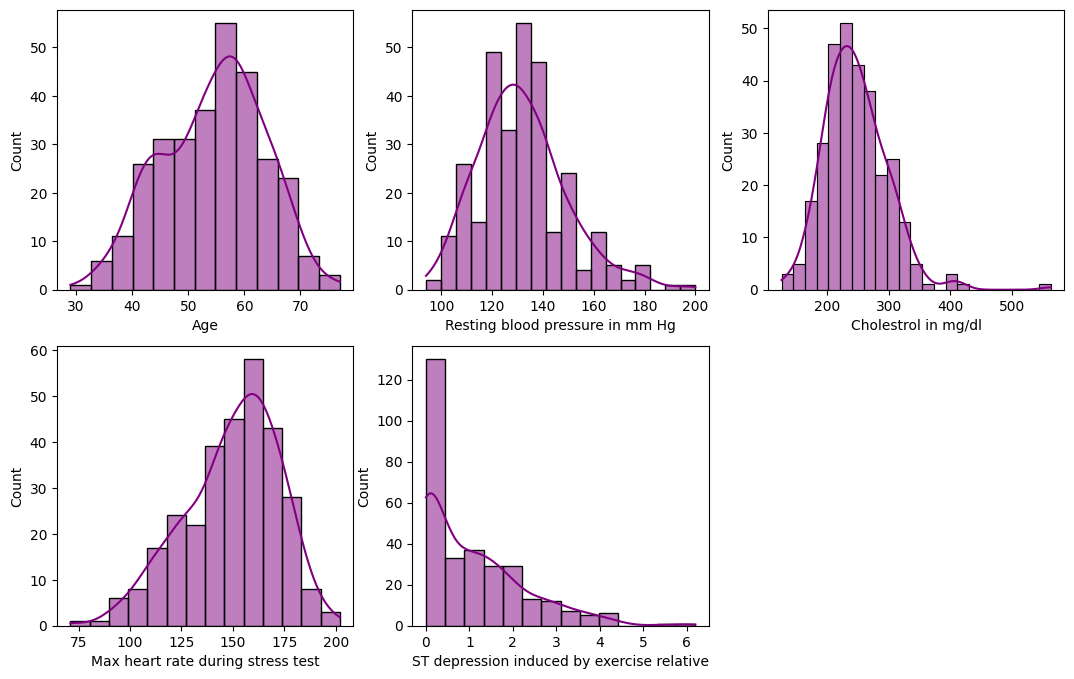

In [136]:
plt.figure(figsize=(13,8))
plt.subplot(2,3,1)
plot_histogram(df,"age","Age")
plt.subplot(2,3,2)
plot_histogram(df,"trestbps","Resting blood pressure in mm Hg")
plt.subplot(2,3,3)
plot_histogram(df,"chol","Cholestrol in mg/dl")
plt.subplot(2,3,4)
plot_histogram(df,"thalach","Max heart rate during stress test")
plt.subplot(2,3,5)
plot_histogram(df,"oldpeak","ST depression induced by exercise relative")

plt.show()

###### **Inference**

* **Age** is approximately *normally* distributed

* **trestbsps**,**chol** is *right* skewed

* **thalach** is *left* skewed

* **oldpeak** is not normal

#### Bivariant Analysis

Features with the target variable

##### Categorical Data with target

In [137]:
def plot_stacked_bar(ax:plt.Axes,dataframe:pd.DataFrame,feat:str,x_label:str,x_ticks:list[str]=None):
  contingency_table = pd.crosstab(dataframe[feat], dataframe['num'])
  contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
  if x_ticks:
    ax = contingency_table_percentage.plot(kind='bar', stacked=True,colormap="tab20b",ax=ax)
    ax.set_xticklabels(x_ticks,rotation=0)
  else:
    ax = contingency_table_percentage.plot(kind='bar', stacked=True,colormap="tab20b",ax=ax)
  ax.set_xlabel(x_label)
  ax.set_ylabel('Percentage')
  ax.set_title(f'Percentage Heart Disease by {x_label}')
  return ax

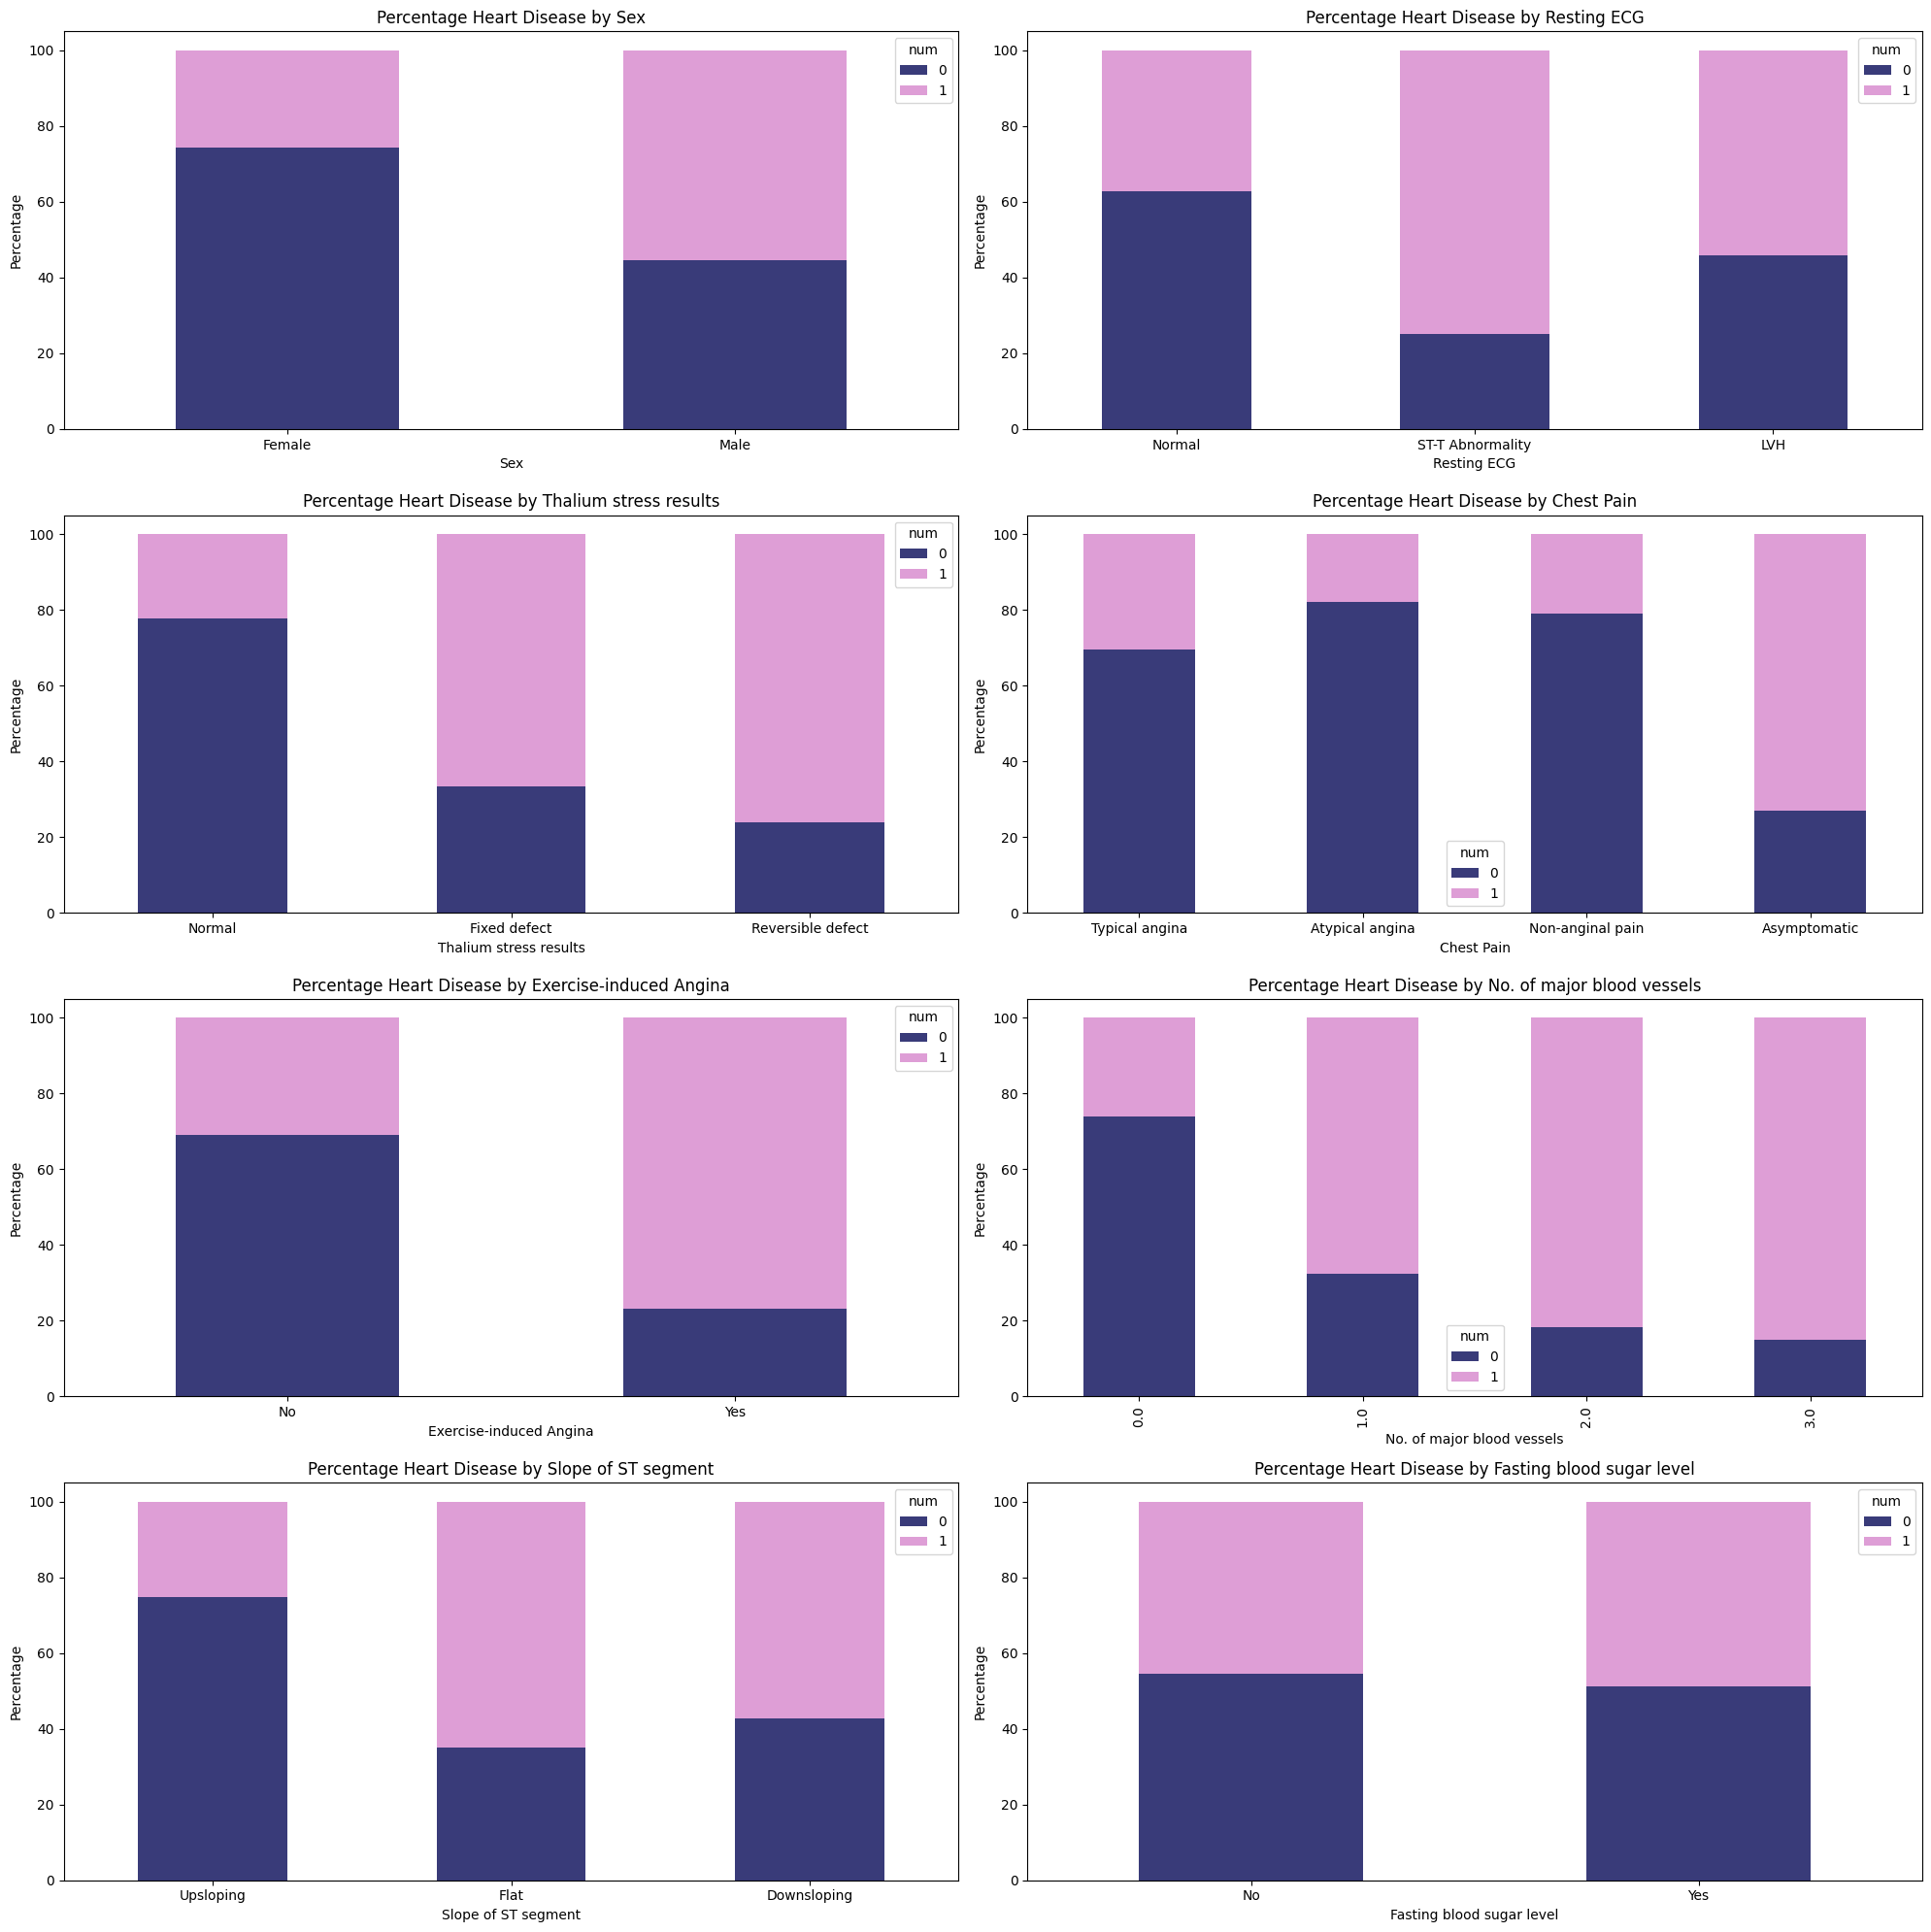

In [138]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()


plot_stacked_bar(axes[0], df, feat='sex', x_label="Sex", x_ticks=['Female', 'Male'])
plot_stacked_bar(axes[1], df, feat='restecg', x_label='Resting ECG', x_ticks=['Normal', 'ST-T Abnormality', 'LVH'])
plot_stacked_bar(axes[2], df, feat='thal', x_label='Thalium stress results', x_ticks=['Normal', 'Fixed defect', 'Reversible defect'])
plot_stacked_bar(axes[3], df, feat='cp', x_label="Chest Pain", x_ticks=['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'])
plot_stacked_bar(axes[4], df, feat='exang', x_label='Exercise-induced Angina', x_ticks=['No', 'Yes'])
plot_stacked_bar(axes[5], df, feat='ca', x_label='No. of major blood vessels')
plot_stacked_bar(axes[6], df, feat='slope', x_label='Slope of ST segment', x_ticks=['Upsloping', 'Flat', 'Downsloping'])
plot_stacked_bar(axes[7], df, feat='fbs', x_label='Fasting blood sugar level', x_ticks=['No', 'Yes'])

plt.tight_layout()
plt.show()

###### **Inference**

* Most *female* patients **did not** have heart disease while almost half the *male* patients **have** heart disease
* Patients that show **abnormal** *ST and T* waves are **more likely** to have heart disease
* Patients with **normal** *thalium stress test* results are likely to be **safe** from disease
* Patients that report **asymptomatic** *chest pain* are **more likely** to have heart disease
*  Patients that report **exercise-related** *angina* are **more likely** to have heart disease
* Blood sugar seems to have **no affect** to predict whether a patient  has heart disease or not.

##### Numeric data with target

In [139]:
def plot_boxplot(ax:plt.axis, dataframe:pd.DataFrame,feat:str,x_label:str):
  ax = sns.boxplot(y=feat, x='num', data=dataframe,ax=ax,palette="Set2")
  ax.set_ylabel(x_label)
  ax.set_xlabel('Heart Disease')
  ax.set_title(f'Box Plot of Target by {x_label}')
  return ax

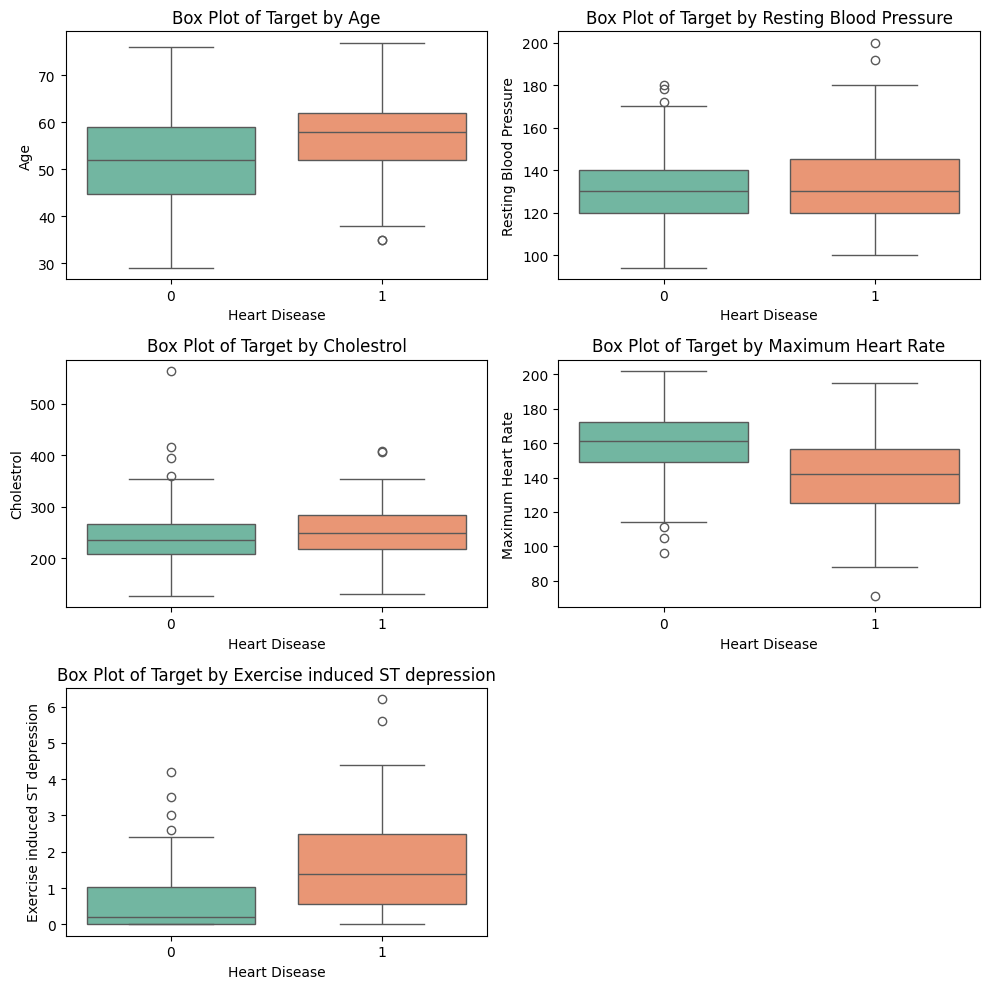

In [140]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()

plot_boxplot(axes[0], df, feat='age', x_label="Age")
plot_boxplot(axes[1], df, feat='trestbps', x_label='Resting Blood Pressure')
plot_boxplot(axes[2], df, feat='chol', x_label='Cholestrol')
plot_boxplot(axes[3], df, feat='thalach', x_label="Maximum Heart Rate")
plot_boxplot(axes[4], df, feat='oldpeak', x_label='Exercise induced ST depression')
axes[5].axis('off')

plt.tight_layout()
plt.show()

###### **Inference**

* *Several **outliers** present in the dataset which needs to be handled*
* **Older** patients are at **higher risk** of Heart Disease
* Patients that showed **higher maximun heart rate** during *stress test* tend to be **safe** from heart disease
* Patients that show a **greater** *ST segment depression* are at a **higher risk** of disease  



### Dealing with Outliers
There are two techniques to identify outliers.
* Z-score method
* IQR method


In [141]:
numeric_feat

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

> If the skewness is **between** *-0.5* and *0.5*, the data are **fairly symmetrical**

> If the skewness is **between** *-1* and *—0.5* or between *0.5* and *1*, the data are **moderately skewed**

> If the skewness is **less** than *-1* or **greater** than *1*, the data are **highly skewed**

In [142]:
for feat in numeric_feat:
  print(f"{feat} skewness = {X_train[feat].skew()}")

age skewness = -0.06885075730219788
trestbps skewness = 0.6962939139840222
chol skewness = 0.8322778497077913
thalach skewness = -0.5447412987907116
oldpeak skewness = 1.4179323894258087


Data has moderate skewness as calculated above and seen graphically aswell. Therefore, **IQR method** will be used to handle the outliers.

Since **Z-score method** assumes a normal distribution and is sensitive to misidentify points as outliers.

On the other hand, the **IQR method** is more robust and less affected by the skewness.

In [143]:
def check_outliers(df:pd.DataFrame,feat_list:list[str]) -> pd.Series:
  Q1 = df[feat_list].quantile(0.25)
  Q3 = df[feat_list].quantile(0.75)
  IQR = Q3 - Q1
  outliers_count_specified = ((df[feat_list] < (Q1 - 1.5 * IQR)) | (df[feat_list] > (Q3 + 1.5 * IQR))).sum()
  return outliers_count_specified


In [144]:
# check outliers using IQR method
check_outliers(X_train,numeric_feat)

age         0
trestbps    8
chol        4
thalach     2
oldpeak     4
dtype: int64

In [145]:
# check outliers using IQR method
check_outliers(X_test,numeric_feat)

age         1
trestbps    1
chol        1
thalach     0
oldpeak     1
dtype: int64

#### How to handle the Outliers
There are two techniques.
* Trimming -> remove them
* Capping -> apply upper and lower limits

In [146]:
def show_outlier_data(dataframe:pd.DataFrame,feat:str) -> pd.DataFrame:
  Q1 = dataframe[feat].quantile(0.25)
  Q3 = dataframe[feat].quantile(0.75)
  IQR = Q3 - Q1
  return dataframe[(dataframe[feat] < (Q1 - 1.5 * IQR)) | (dataframe[feat] > (Q3 + 1.5 * IQR))]

In [147]:
# display the trestbps outlier rows
show_outlier_data(X_train,"trestbps")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
126,56,0,4,200,288,1,2,133,1,4.0,3,2.0,7.0
183,59,1,1,178,270,0,2,145,0,4.2,3,0.0,7.0
172,59,0,4,174,249,0,0,143,1,0.0,2,0.0,3.0
83,68,1,3,180,274,1,2,150,1,1.6,2,0.0,7.0
213,66,0,4,178,228,1,0,165,1,1.0,2,2.0,7.0
14,52,1,3,172,199,1,0,162,0,0.5,1,0.0,7.0
201,64,0,4,180,325,0,0,154,1,0.0,1,0.0,3.0
188,54,1,2,192,283,0,2,195,0,0.0,1,1.0,7.0


**trestbps** is the Resting Blood Pressure recorded when a patient is admitted to the hospital. These readings are a case of hypertension which may be due to some heart diseases so cannot be erroneous. Hence cannot be removed so it will be **capped**

In [148]:
# display the cholestrol outlier rows
show_outlier_data(X_train,"chol")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
173,62,0,4,140,394,0,2,157,0,1.2,2,0.0,3.0
181,56,0,4,134,409,0,2,150,1,1.9,2,2.0,7.0
48,65,0,3,140,417,1,2,157,0,0.8,1,1.0,3.0
121,63,0,4,150,407,0,2,154,0,4.0,2,3.0,7.0


**chol** is the Cholestrol recorded in mg/dl. These readings are a case of patients with high cholestrol. These readings are possible so cannot be erroneous. Hence cannot be removed so it will be **capped**

In [149]:
# display the max heart rate achieved outlier rows
show_outlier_data(X_train,"thalach")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
296,59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0
245,67,1,4,120,237,0,0,71,0,1.0,2,0.0,3.0


**thalach** is the maximum heart rate acheived during stress test. These readings are possible so cannot be erroneous. Hence cannot be removed so it will be **capped**

In [150]:
# display the st depression outlier rows
show_outlier_data(X_train,"oldpeak")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
183,59,1,1,178,270,0,2,145,0,4.2,3,0.0,7.0
123,55,1,4,140,217,0,0,111,1,5.6,3,0.0,7.0
91,62,0,4,160,164,0,2,145,0,6.2,3,3.0,7.0
191,51,1,4,140,298,0,0,122,1,4.2,2,3.0,7.0


**oldpeak** is the ST segment depression rate. These readings are possible so cannot be erroneous. Hence cannot be removed so it will be **capped**

In [151]:
def cap_outliers(df:pd.DataFrame,feat_list:list[str]) -> pd.DataFrame:
  data = df.copy()
  IQR = data[feat_list].quantile(0.75) - data[feat_list].quantile(0.25)
  lower_limit = data[feat_list].quantile(0.25) - (1.5 * (IQR))
  upper_limit = data[feat_list].quantile(0.75) + (1.5 * (IQR))
  data[feat_list] = np.where(
      data[feat_list] < lower_limit,
      lower_limit,
      np.where(data[feat_list] > upper_limit,
              upper_limit,
              data[feat_list]
              )
      )
  return data


In [152]:
x_train_cap = cap_outliers(X_train,numeric_feat)
x_test_cap = cap_outliers(X_test,numeric_feat)


In [153]:
# check outliers using IQR method
check_outliers(x_train_cap,numeric_feat)

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64

In [154]:
# check outliers using IQR method
check_outliers(x_test_cap,numeric_feat)

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64

The outlier have been capped as the result shows

In [155]:
for feat in numeric_feat:
  print(f"{feat} skewness = {x_train_cap[feat].skew()}")

age skewness = -0.06885075730219788
trestbps skewness = 0.3278639613104055
chol skewness = 0.456882260396959
thalach skewness = -0.4107866564620405
oldpeak skewness = 1.09747860410658


It is also to be noted that the data has become more gaussian after capping

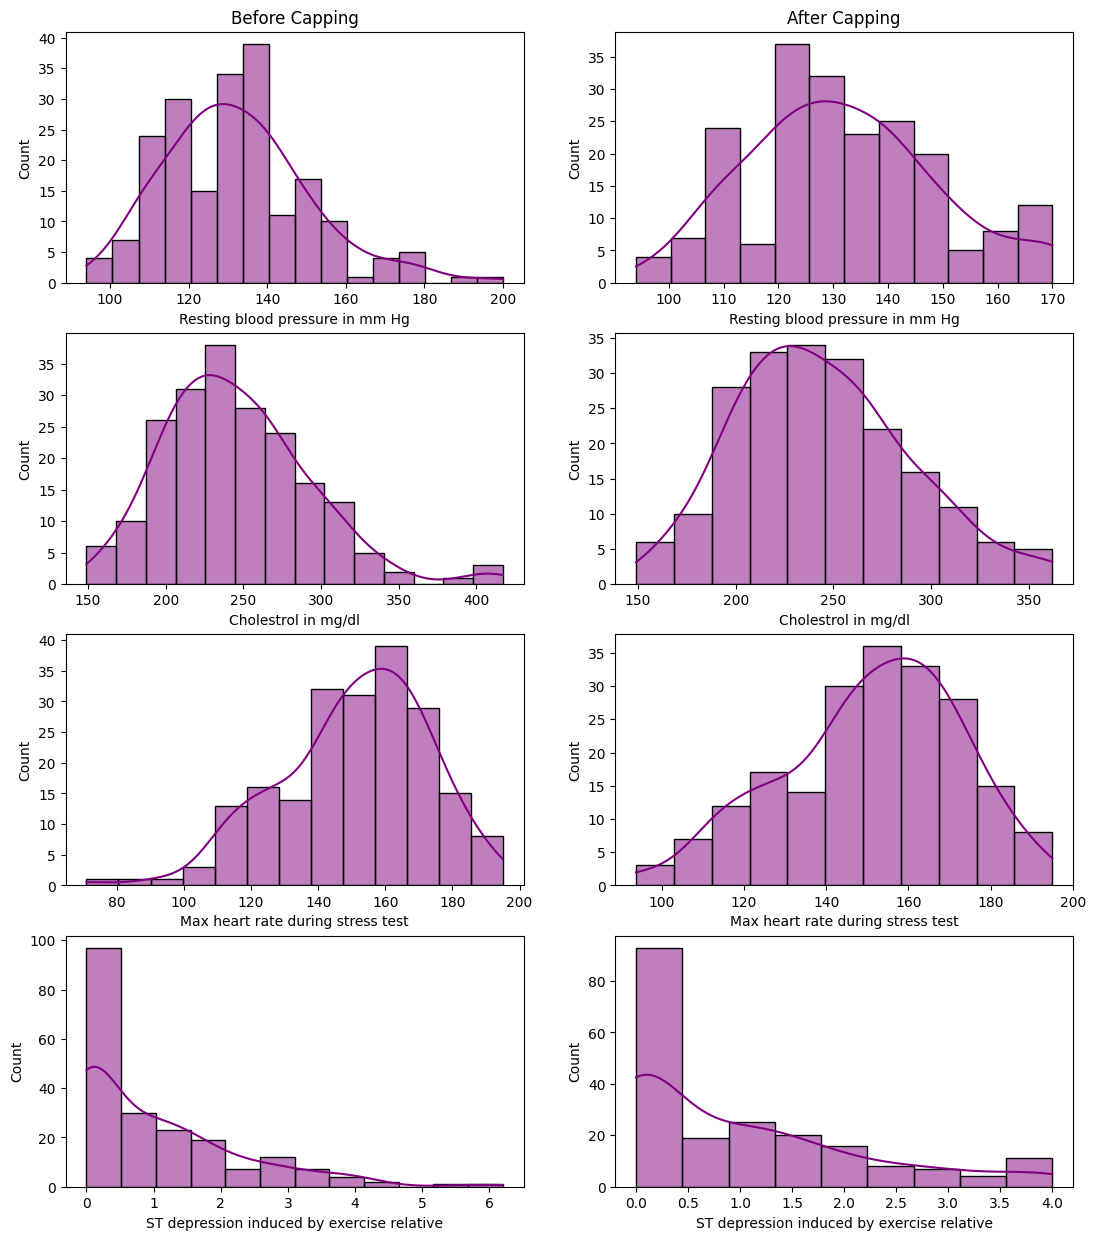

In [156]:
plt.figure(figsize=(13,15))

plt.subplot(4,2,1)
plot_histogram(X_train,"trestbps","Resting blood pressure in mm Hg")
plt.title('Before Capping')
plt.subplot(4,2,2)
plot_histogram(x_train_cap,"trestbps","Resting blood pressure in mm Hg")
plt.title('After Capping')

plt.subplot(4,2,3)
plot_histogram(X_train,"chol","Cholestrol in mg/dl")
plt.subplot(4,2,4)
plot_histogram(x_train_cap,"chol","Cholestrol in mg/dl")

plt.subplot(4,2,5)
plot_histogram(X_train,"thalach","Max heart rate during stress test")
plt.subplot(4,2,6)
plot_histogram(x_train_cap,"thalach","Max heart rate during stress test")


plt.subplot(4,2,7)
plot_histogram(X_train,"oldpeak","ST depression induced by exercise relative")
plt.subplot(4,2,8)
plot_histogram(x_train_cap,"oldpeak","ST depression induced by exercise relative")





plt.show()

### Handling Missing Values

In [157]:
# creating copies so future errors easier to identify and solve
x_train2 = x_train_cap.copy()
x_test2 = x_test_cap.copy()

In [158]:
x_train2.isnull().mean()*100 # percentage of values missing

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          0.985222
thal        0.985222
dtype: float64

* Less than **1%** values missing from both features
* Both missing features are **categorical**


In [159]:
print("Total number of records in train set are: ", x_train2.shape[0])

Total number of records in train set are:  203


**Small dataset** so cannot remove missing values

**Alternates**


*   Replace with mode
*   Use KNN imputation to fill missing values



In [160]:
x_train2[x_train2['ca'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
166,52.0,1,3,138.0,223.0,0,0,169.0,0,0.0,1,NaN,3.0
302,38.0,1,3,138.0,175.0,0,0,173.0,0,0.0,1,NaN,3.0


In [161]:
x_train2[x_train2['thal'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
266,52.0,1,4,128.0,204.0,1,0,156.0,1,1.0,2,0.0,NaN
87,53.0,0,3,128.0,216.0,0,2,115.0,0,0.0,1,0.0,NaN


#### Impute missing values with the mode

In [162]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='most_frequent')
si.set_output(transform='pandas')
x_train2_trf = si.fit_transform(x_train2)
x_test2_trf = si.transform(x_test2)

In [163]:
# thal imputed records
print("Mode of x_train_cap['thal'] = ",x_train_cap['thal'].mode()[0])
x_train2_trf[(x_train2_trf.index == 87)| (x_train2_trf.index == 266)]

Mode of x_train_cap['thal'] =  3.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,3.0
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,3.0


In [164]:
# ca imputed records
print("Mode of x_train_cap['ca'] = ",x_train_cap['ca'].mode()[0])
x_train2_trf[(x_train2_trf.index == 166)| (x_train2_trf.index == 302)]

Mode of x_train_cap['ca'] =  0.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,0.0,3.0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0


#### Impute missing values using KNN
---
*KNNImputer* uses **nan_euclidean_distances** and replaces missing value with the average of the KNN

 Since this is classification imputation setting **n_neighbors=1** so it only considers the closest neighbor. The value returned is the value of that neighbor. We **do not** get averages.


In [165]:
from sklearn.impute import KNNImputer


knni = KNNImputer(n_neighbors=1)
knni.set_output(transform='pandas')
x_train2_trf2 = knni.fit_transform(x_train2)
x_test2_trf2 = knni.transform(x_test2)

In [166]:
# thal imputed records
x_train2_trf2[(x_train2_trf2.index == 87)| (x_train2_trf2.index == 266)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,3.0
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,7.0


In [167]:
# ca imputed records
x_train2_trf2[(x_train2_trf2.index == 166)| (x_train2_trf2.index == 302)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,0.0,3.0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0


### Feature Scaling

In [168]:
# remove it as num is target variable not part of train or test set
cat = categorical_feat.copy()
cat.remove('num')
cat

['sex', 'restecg', 'thal', 'slope', 'cp', 'exang', 'ca', 'fbs']

#### **Two Approaches**

1.   **Standardization** - *StandardScaler*
2.   **Normalization** - *MinMaxScaler*



#### **Standardization**

In [169]:
from sklearn.preprocessing import StandardScaler

# standardize the data imputed with mode
ss1 = StandardScaler()
ss1.set_output(transform='pandas')
x_train3_mode = ss1.fit_transform(x_train2_trf[numeric_feat])
x_test3_mode = ss1.transform(x_test2_trf[numeric_feat])

# standard scaling + mode imputation
x_train3_std_mode = pd.concat([x_train2_trf[cat],x_train3_mode],axis=1)
x_test3_std_mode = pd.concat([x_test2_trf[cat],x_test3_mode],axis=1)



In [170]:
print("Before\n",x_train2_trf.head(2))
print("After\n",x_train3_std_mode.head(2))

Before
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
37  57.0  1.0  4.0     150.0  276.0  0.0      2.0    112.0    1.0      0.6   
16  48.0  1.0  2.0     110.0  229.0  0.0      0.0    168.0    0.0      1.0   

    slope   ca  thal  
37    2.0  1.0   6.0  
16    3.0  0.0   7.0  
After
     sex  restecg  thal  slope   cp  exang   ca  fbs       age  trestbps  \
37  1.0      2.0   6.0    2.0  4.0    1.0  1.0  0.0  0.281915  1.047231   
16  1.0      0.0   7.0    3.0  2.0    0.0  0.0  0.0 -0.697283 -1.258495   

        chol   thalach   oldpeak  
37  0.703355 -1.826463 -0.346171  
16 -0.353450  0.791356  0.003880  


In [171]:
from sklearn.preprocessing import StandardScaler

ss2 = StandardScaler()
ss2.set_output(transform='pandas')
x_train3_knn = ss2.fit_transform(x_train2_trf2[numeric_feat])
x_test3_knn = ss2.transform(x_test2_trf2[numeric_feat])

# standard scaling + knn imputation
x_train3_std_knn = pd.concat([x_train2_trf2[cat],x_train3_knn],axis=1)
x_test3_std_knn = pd.concat([x_test2_trf2[cat],x_test3_knn],axis=1)


In [172]:
print("Before\n",x_train2_trf2.head(2))
print("After\n",x_train3_std_knn.head(2))

Before
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
37  57.0  1.0  4.0     150.0  276.0  0.0      2.0    112.0    1.0      0.6   
16  48.0  1.0  2.0     110.0  229.0  0.0      0.0    168.0    0.0      1.0   

    slope   ca  thal  
37    2.0  1.0   6.0  
16    3.0  0.0   7.0  
After
     sex  restecg  thal  slope   cp  exang   ca  fbs       age  trestbps  \
37  1.0      2.0   6.0    2.0  4.0    1.0  1.0  0.0  0.281915  1.047231   
16  1.0      0.0   7.0    3.0  2.0    0.0  0.0  0.0 -0.697283 -1.258495   

        chol   thalach   oldpeak  
37  0.703355 -1.826463 -0.346171  
16 -0.353450  0.791356  0.003880  


#### **Normalization**

In [173]:
from sklearn.preprocessing import MinMaxScaler

# standardize the data imputed with mode
mms1 = MinMaxScaler()
mms1.set_output(transform='pandas')
x_train4_mode = mms1.fit_transform(x_train2_trf[numeric_feat])
x_test4_mode = mms1.transform(x_test2_trf[numeric_feat])

# min max scaling + mode imputation
x_train4_std_mode = pd.concat([x_train2_trf[cat],x_train4_mode],axis=1)
x_test4_std_mode = pd.concat([x_test2_trf[cat],x_test4_mode],axis=1)

In [174]:
print("Before\n",x_train2_trf.head(2))
print("After\n",x_train4_std_mode.head(2))

Before
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
37  57.0  1.0  4.0     150.0  276.0  0.0      2.0    112.0    1.0      0.6   
16  48.0  1.0  2.0     110.0  229.0  0.0      0.0    168.0    0.0      1.0   

    slope   ca  thal  
37    2.0  1.0   6.0  
16    3.0  0.0   7.0  
After
     sex  restecg  thal  slope   cp  exang   ca  fbs       age  trestbps  \
37  1.0      2.0   6.0    2.0  4.0    1.0  1.0  0.0  0.534884  0.736842   
16  1.0      0.0   7.0    3.0  2.0    0.0  0.0  0.0  0.325581  0.210526   

        chol   thalach  oldpeak  
37  0.596244  0.180247     0.15  
16  0.375587  0.733333     0.25  


In [175]:
from sklearn.preprocessing import MinMaxScaler

# standardize the data imputed with mode
mms1 = MinMaxScaler()
mms1.set_output(transform='pandas')
x_train4_knn = mms1.fit_transform(x_train2_trf2[numeric_feat])
x_test4_knn = mms1.transform(x_test2_trf2[numeric_feat])

# min max scaling + knn imputation
x_train4_std_knn = pd.concat([x_train2_trf2[cat],x_train4_knn],axis=1)
x_test4_std_knn = pd.concat([x_test2_trf2[cat],x_test4_knn],axis=1)


In [176]:
print("Before\n",x_train2_trf.head(2))
print("After\n",x_train4_std_knn.head(2))

Before
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
37  57.0  1.0  4.0     150.0  276.0  0.0      2.0    112.0    1.0      0.6   
16  48.0  1.0  2.0     110.0  229.0  0.0      0.0    168.0    0.0      1.0   

    slope   ca  thal  
37    2.0  1.0   6.0  
16    3.0  0.0   7.0  
After
     sex  restecg  thal  slope   cp  exang   ca  fbs       age  trestbps  \
37  1.0      2.0   6.0    2.0  4.0    1.0  1.0  0.0  0.534884  0.736842   
16  1.0      0.0   7.0    3.0  2.0    0.0  0.0  0.0  0.325581  0.210526   

        chol   thalach  oldpeak  
37  0.596244  0.180247     0.15  
16  0.375587  0.733333     0.25  
